In [1]:
import Pkg

In [2]:
Pkg.activate("D:\\Users\\gabri\\Documents\\Data Science & Machine Learning Spring 2025\\Lundquist-CMOR438-Spring2025\\juMLia")

  Activating project at `D:\Users\gabri\Documents\Data Science & Machine Learning Spring 2025\Lundquist-CMOR438-Spring2025\juMLia`


In [3]:
import MLDatasets: MNIST
using DataFrames, Plots, ColorSchemes

In [4]:
trainMNIST = MNIST(:train)
testMNIST = MNIST(:test)
traininputs, traintargets = trainMNIST[:]
testinputs, testtargets = testMNIST[:]
# Nicely, the inputs are already scaled to 1.

(features = Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; … ;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], targets = [7, 2, 1, 0, 4, 1, 4, 9, 5, 9  …  7, 8, 9, 0, 1, 2, 3, 4, 5, 6])

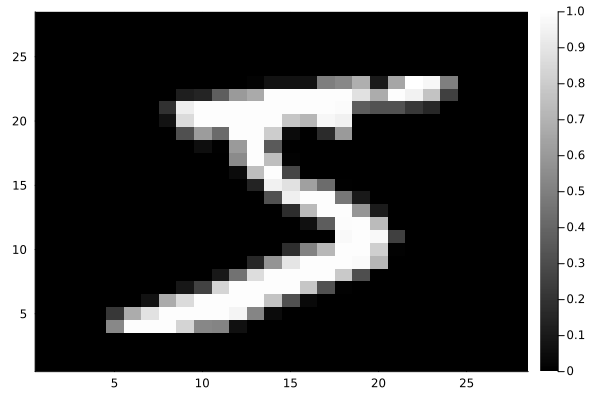

In [5]:
heatmap(reverse(transpose(traininputs[:,:,1]), dims=1), cmap=:bone)

In [6]:
@time reduce(vcat, traininputs[:,:,1])
@time reshape(traininputs[:,:,3], (length(traininputs[:,:,3]),1))
# reshape is much faster and more memory efficient than that reduce call!
@time vec(traininputs[:,:,3])
# vec is slightly better...

  0.189296 seconds (863.22 k allocations: 46.428 MiB, 9.42% gc time, 99.89% compilation time)
  0.009295 seconds (4.77 k allocations: 259.175 KiB, 99.28% compilation time)
  0.004583 seconds (5.35 k allocations: 283.949 KiB, 98.95% compilation time)


784-element Vector{Float32}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [6]:
# Preallocation
traininputsflat = zeros(size(traininputs,1)*size(traininputs,2), size(traininputs,3))
traintargetsencoded = BitArray(undef, 10, size(traintargets)[end])

10×60000 BitMatrix:
 1  0  1  0  0  1  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 1  1  0  0  0  0  0  1  0  0  1  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 1  0  0  0  0  0  0  1  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 1  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  1  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 1  0  1  0  0  0  1  0  0  0  1  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  1  1  0  0  0  1  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 1  0  0  0  0  1  0  0  0  1  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  1  0  0  0  1  0  0  0  1  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  1  0  1  0  0  0  0  0  1     0  0  0  0  0  0  0  0  0  0  0  0

In [8]:
function assignbitarrayfunc1!(targets, prealloctargetsencoded)
    for (targetindex, targetnum) in enumerate(targets)
        prealloctargetsencoded[:,targetindex] .= BitArray([zeros(targetnum); 1; zeros(9 - targetnum)])
    end
    return prealloctargetsencoded
end

function assignbitarrayfunc3!(targets, prealloctargetsencoded)
    for (targetindex, targetnum) in enumerate(targets)
        prealloctargetsencoded[:,targetindex] = BitArray(zeros(10))
    end
    return prealloctargetsencoded
end

function assignbitarrayfunc3!(targets, prealloctargetsencoded)
    for (targetindex, targetnum) in enumerate(targets)
        prealloctargetsencoded[:,targetindex] = BitArray(zeros(10))
        prealloctargetsencoded[targetnum+1, targetindex] = 1
    end
end

function assignbitarrayfunc4!(targets, prealloctargetsencoded)
    for (targetindex, targetnum) in enumerate(targets)
        prealloctargetsencoded[:,targetindex] = zeros(10)
        prealloctargetsencoded[targetnum+1, targetindex] = 1
    end
end

function assignbitarrayfunc5!(targets, prealloctargetsencoded)
    for (targetindex, targetnum) in enumerate(targets)
        prealloctargetsencoded[:,targetindex] .= BitArray(zeros(10))
        prealloctargetsencoded[targetnum+1, targetindex] = 1
    end
end

function assignbitarrayfunc6!(targets, prealloctargetsencoded)
    for (targetindex, targetnum) in enumerate(targets)
        prealloctargetsencoded[:,targetindex] .= zeros(10)
        prealloctargetsencoded[targetnum+1, targetindex] = 1
    end
end

function assignbitarrayfunc7!(targets, prealloctargetsencoded)
    for (targetindex, targetnum) in enumerate(targets)
        prealloctargetsencoded[:,targetindex] .= 0
        prealloctargetsencoded[targetnum+1, targetindex] = 1
    end
end

# 7 is easily the fastest, because it doesn't construct any new arrays.

assignbitarrayfunc7! (generic function with 1 method)

In [7]:
"Flattens every dimension except the final one"
function flattenmultiarray(array::Array{<:Any, 3})
    arrayflat = Array{eltype(array), 2}(undef, prod(size(array)[1:2]), size(array)[3]) # Preallocate array
    for i in 1:(size(array)[end])
        arrayflat[:,i] = vec(traininputs[:,:,i])
    end
    return arrayflat
end

function onehotencodedigits(digit::Int)
    digitencoded = BitArray(zeros(10))
    digitencoded[digit+1] = 1
    return digitencoded
end

"One-hot encodes a vector of digits 0-9."
function onehotencodedigits(digitlist::Vector{<:Int})
    return onehotencodedigits.(digitlist)
end

function onehotdecodedigits(digitsencoded::BitArray)
    return argmax(digitsencoded) - 1
end

function onehotdecodedigits(digitsencoded::Vector{<:BitArray})
    return onehotdecodedigits.(digitsencoded)
end

function onehotdecodedigits(digitsencoded::Vector{<:Number})
    return argmax(digitsencoded) - 1
end

onehotdecodedigits (generic function with 3 methods)

In [8]:
traininputsflat = flattenmultiarray(traininputs)
traintargetsencoded = onehotencodedigits(traintargets)
# traintargetsdecoded = onehotdecodedigits(traintargetsencoded)

60000-element Vector{BitVector}:
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
 ⋮
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

In [9]:
traininputsflatvec = [traininputsflat[:, index] for index in 1:(size(traininputsflat)[end])]

60000-element Vector{Vector{Float32}}:
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0,

In [177]:
traininputsflatvec[1]

784-element Vector{Float32}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [10]:
sigmoid(value) = 1.0 ./ (1.0 .+ exp.(-value))

sigmoid_firstderiv(value) = sigmoid(value) .* (1.0 .- sigmoid(value))

"""Mean squared error between `predictions` and `targets`. Used as a 
loss function."""
meansquarederror(predictions, targets) = 0.5 * sum((predictions .- targets).^2)

meansquarederror

In [180]:
sigmoid_firstderiv(3)

0.045176659730912

In [12]:
temp3 = [[1,2], [3,4]]
temp4 = [[1,3], [-3, 0]]
print(meansquarederror([1,2], [1, 3]))
sum(meansquarederror.(temp3, temp4)) / 2

0.5

13.25

In [13]:
isabstracttype(Function)

true

In [14]:
isabstracttype(Vector{Function})

false

In [15]:
mutable struct SingleNeuron{ActivatorF, GradientF, LossF}
    const activationfunction::ActivatorF
    const gradient::GradientF
    const loss::LossF
    weights::Vector{Float64}
    bias::Float64
    previousweights::Vector{Float64}
    previousbias::Float64
    losshistory::Array{Float64,1}
    prevlosshistory::Array{Float64,1}
end 


In [11]:
mutable struct WeightLayer{ActivatorF, GradientF}
    const activationfunction::ActivatorF
    const gradient::GradientF
    weights::Matrix{Float64}
    bias::Vector{Float64}
    previousweights::Matrix{Float64}
    previousbias::Vector{Float64}
end

In [17]:
temp2 = WeightLayer{typeof(sigmoid), typeof(sigmoid_firstderiv)}

WeightLayer{typeof(sigmoid), typeof(sigmoid_firstderiv)}

In [18]:
Vector{WeightLayer{typeof(sigmoid), typeof(sigmoid_firstderiv)}} <: Vector{WeightLayer}

false

In [19]:
isabstracttype(Vector{WeightLayer})

false

In [12]:
abstract type DenseNeuralNetwork end

# Struct of arrays
mutable struct DenseNeuralNetworkSoA{LossF} <: DenseNeuralNetwork
    const activationfunctions::Vector{Function}
    const gradients::Vector{Function}
    const loss::LossF
    weights::Vector{Matrix{Float64}} # Can't store as array because matrices may have different sizes
    bias::Vector{Vector{Float64}}
    previousweights::Vector{Matrix{Float64}}
    previousbias::Vector{Vector{Float64}}
    losshistory::Vector{Float64}
    prevlosshistory::Vector{Float64}
end 

# Array of structs
mutable struct DenseNeuralNetworkAoS{LossF} <: DenseNeuralNetwork
    const loss::LossF
    weightlayers::Vector{WeightLayer}
    losshistory::Vector{Float64}
    prevlosshistory::Vector{Float64}
end

In [49]:
function initweights(layerlengths; randweights = true)
    numweightmatrices = length(layerlengths) - 1
    weights = Vector{Matrix{Float64}}(undef, numweightmatrices)
    bias = Vector{Vector{Float64}}(undef, numweightmatrices)
    for layerindex in 1:numweightmatrices
        if randweights
            weights[layerindex] = (sqrt(2 / layerlengths[layerindex]) 
                                    .* randn((layerlengths[layerindex+1], 
                                                layerlengths[layerindex])))
            
            bias[layerindex] = (sqrt(2 / layerlengths[layerindex])
                                .* randn(layerlengths[layerindex+1]))
        else
            weights[layerindex] = zeros(layerlengths[layerindex+1], 
                                        layerlengths[layerindex])
            bias[layerindex] = zeros(layerlengths[layerindex+1])
        end
    end
    return (weights, bias)
end

initweights (generic function with 1 method)

In [50]:
W, B = initweights([784, 60, 60, 10])

xi = traininputsflatvec[1]
yi = traintargetsencoded[1]
a0 = xi
println(size(a0))

z1 = W[1] * a0 .+ B[1]
a1 = sigmoid(z1)

println(size(W[1]))
println(size(z1))
println(size(a1))

z2 = W[2] * a1 + B[2]
a2 = sigmoid(z2)

println(size(W[2]))
println(size(z2))
println(size(a2))

z3 = W[3] * a2 .+ B[3]
a3 = sigmoid(z3)
y_hat = a3

println(size(W[3]))
println(size(z3))
println(size(a3))

println("Prediction: $(onehotdecodedigits(y_hat))")
println("Target: $(onehotdecodedigits(yi))")
println("mse = $(meansquarederror(y_hat, yi))")

(784,)
(60, 784)
(60,)
(60,)
(60, 60)
(60,)
(60,)
(10, 60)
(10,)
(10,)
Prediction: 8
Target: 5
mse = 1.388279544063059


In [51]:
W

3-element Vector{Matrix{Float64}}:
 [0.022629372192538782 -0.021102153139053125 … 0.03906542341373728 0.04766684378844533; 0.02309939159975946 -0.005375696268854313 … 0.011656513600582813 -0.04166175633214838; … ; -0.022173082570931677 0.034982570163637365 … 0.04658531377469179 0.010556553941166339; -0.02128580181571605 -0.012045596495727612 … -0.050278433240654445 0.06266086419254287]
 [-0.21524035651367515 -0.07809659434737633 … 0.0006742392666361333 0.009032135119824139; 0.10073036084422789 0.4660376913082446 … -0.0710491125481283 -0.11023140843225679; … ; 0.0523421175955482 -0.0604904670609485 … 0.14049642892670094 -0.09532338141005202; -0.11210935933812533 0.05223092243998382 … 0.05147833434163181 0.071276999617637]
 [-0.2531935553658355 -0.03433727267552685 … 0.2887656895534446 0.1535279349684589; -0.07294730896501452 -0.13966561118230078 … 0.12451168979928114 0.12667757620668033; … ; 0.3196886636617178 0.18559845963679364 … -0.06534732779485872 0.16951100098743; 0.13926566213980

In [52]:
function DenseNeuralNetworkSoA(activationfunctions::Vector,
                          gradientfunctions::Vector,
                          lossfunction, 
                          weights::Vector{Matrix{Float64}}, 
                          bias::Vector{Vector{Float64}})
    if length(activationfunctions) != length(gradientfunctions)
        error("Function lists must be of the same length. \
                Given lengths are $(length(activationfunctions)) \
                and $(length(gradientfunctions)).")
    end
    
    if length(weights) != length(bias)
        error("Weights and bias vectors must be of compatible length. \
                Given lengths are $(length(weights)) \
                and $(length(bias)).")
    end

    if length(weights) != length(activationfunctions)
        error("Number of weight matrices and number of functions \
                be the same. Given are $(length(weights)) \
                weights and $(length(activationfunctions)) \
                functions.")
    end

    return DenseNeuralNetworkSoA{typeof(lossfunction)}(activationfunctions, 
                                                  gradientfunctions, 
                                                  lossfunction, 
                                                  weights, bias, weights, bias,
                                                  [], [])
end

function DenseNeuralNetworkSoA(activationfunctions::Vector,
                          gradientfunctions::Vector,
                          lossfunction, 
                          numnodesperlayer)

    numlayers = length(activationfunctions) + 1

    if (length(numnodesperlayer) != numlayers
            && length(numnodesperlayer) > 1)
        error("Must be either a constant node count or as many 
                node counts as there are layers. \
                Given layer count is $(numlayers) \
                and the node counts specified are of length $(length(numnodesperlayer)).")
    end

    weights = nothing
    bias = nothing
    if isa(numnodesperlayer, <:Int)
        (weights, bias) = initweights(fill(numnodesperlayer, numlayers))
    else
        (weights, bias) = initweights(numnodesperlayer)
    end

    return DenseNeuralNetworkSoA(activationfunctions, gradientfunctions, 
                            lossfunction, 
                            weights, bias, weights, bias,
                            [], [])
end

function DenseNeuralNetworkSoA(activationfunction, 
                          gradientfunction, 
                          lossfunction, 
                          weights::Vector{Matrix{Float64}}, 
                          bias::Vector{Vector{Float64}})

    numweightmatrices = length(weights)
    return DenseNeuralNetworkSoA(fill(activationfunction, numweightmatrices), 
                            fill(gradientfunction, numweightmatrices), 
                            lossfunction, weights, bias)
end

function DenseNeuralNetworkSoA(activationfunction, 
                          gradientfunction, 
                          lossfunction, 
                          numnodesperlayer::Vector{<:Int})

    numlayers = length(numnodesperlayer)
    return DenseNeuralNetworkSoA(fill(activationfunction, numlayers - 1), 
                            fill(gradientfunction, numlayers - 1), 
                            lossfunction, weights, bias)
end

function DenseNeuralNetworkSoA(weights::Vector{Matrix{Float64}}, 
                          bias::Vector{Vector{Float64}})
    return DenseNeuralNetworkSoA(sigmoid, sigmoid_firstderiv, meansquarederror, 
                                 weights, bias)
end

function DenseNeuralNetworkSoA(inputlength::Int, 
                          outputlength::Int; 
                          numhiddenlayers::Int=2, 
                          hiddenlayerlengths::Vector{<:Int} = 
                                fill(round(Int, √(inputlength * outputlength)), 
                                     numhiddenlayers)
                          )
    numweightmatrices = 1 + numhiddenlayers
    if length(hiddenlayerlengths) != numhiddenlayers
        error("`hiddenlayerlengths` vector must have $(numhiddenlayers) \
                entries.")
    end
    layerlengths = [inputlength; hiddenlayerlengths; outputlength]
    return DenseNeuralNetworkSoA(initweights(layerlengths)...)
end 

function DenseNeuralNetworkSoA(nodecounts::Vector{<:Int})
    return DenseNeuralNetworkSoA(initweights(nodecounts)...)
end 

DenseNeuralNetworkSoA

In [53]:
function WeightLayer(activationfunction, gradient, 
                     weights::Matrix{Float64}, bias::Vector{Float64})
    return WeightLayer{typeof(activationfunction), 
                       typeof(gradient)}(activationfunction, 
                                         gradient, 
                                         weights, bias, 
                                         weights, bias)
end

function WeightLayer(activationfunction, gradient, 
                     inputlength::Int, outputlength::Int)
    return WeightLayer(activationfunction, gradient, 
                       zeros(outputlength, inputlength), 
                       zeros(outputlength))
end

function initweightlayers(activationfunctions::Vector{<:Function}, 
                          gradientfunctions::Vector{<:Function}, 
                          weights::Vector{Matrix{Float64}}, 
                          bias::Vector{Vector{Float64}})
    return [WeightLayer(activator, gradient, weightsmat, biasvec)
                    for (activator, gradient, weightsmat, biasvec)
                        in zip(activationfunctions, 
                               gradientfunctions, 
                               weights, 
                               bias)
                    ]
end 

function initweightlayers(activationfunctions::Vector{<:Function}, 
                            gradientfunctions::Vector{<:Function}, 
                            numnodesperlayer::Int)
    return [WeightLayer(activator, gradient, 
                        numnodesperlayer[index], 
                        numnodesperlayer[index+1])
            for (activator, gradient, index)
                in zip(activationfunctions, 
                        gradientfunctions, 
                        1:(length(numnodesperlayer) - 1))
        ]
end

initweightlayers (generic function with 2 methods)

In [54]:
function DenseNeuralNetworkAoS(lossfunction, layers::Vector{WeightLayer{T,U}}) where T where U
    return DenseNeuralNetworkAoS{typeof(lossfunction)}(lossfunction, layers, 
                                                       [], [])
end

function DenseNeuralNetworkAoS(activationfunctions::Vector,
                                gradientfunctions::Vector,
                                lossfunction, 
                                weights::Vector{Matrix{Float64}}, 
                                bias::Vector{Vector{Float64}})
    if length(activationfunctions) != length(gradientfunctions)
        error("Function lists must be of the same length. \
                Given lengths are $(length(activationfunctions)) \
                and $(length(gradientfunctions)).")
    end

    if length(weights) != length(bias)
        error("Weights and bias vectors must be of compatible length. \
                Given lengths are $(length(weights)) \
                and $(length(bias)).")
    end

    if length(weights) != length(activationfunctions)
        error("Number of weight matrices and number of functions \
                be the same. Given are $(length(weights)) \
                weights and $(length(activationfunctions)) \
                functions.")
    end

    layers = initweightlayers(activationfunctions, gradientfunctions, 
                                weights, bias)

    return DenseNeuralNetworkAoS(lossfunction, layers) 
end

function DenseNeuralNetworkAoS(activationfunctions::Vector,
                                gradientfunctions::Vector,
                                lossfunction, 
                                numnodesperlayer::Vector{<:Int})

    numlayers = length(activationfunctions) + 1

    if length(activationfunctions) != length(gradientfunctions)
        error("Function lists must be of the same length. \
                Given lengths are $(length(activationfunctions)) \
                and $(length(gradientfunctions)).")
    end

    if (length(numnodesperlayer) != numlayers
            && length(numnodesperlayer) > 1)
        error("Must be either a constant node count or as many \
                node counts as there are layers. \
                Given layer count is $(numlayers) \
                and the node counts specified are \
                $(numnodesperlayer).")
    end

    weightlayers = initweightlayers(activationfunctions, 
                                    gradientfunctions, 
                                    numnodesperlayer)

    return DenseNeuralNetworkAoS(lossfunction, weightlayers)
end

function DenseNeuralNetworkAoS(activationfunctions::Vector,
                                gradientfunctions::Vector,
                                lossfunction, 
                                numnodesperlayer::Int)

    return DeepNeuralNetworkAoS(activationfunctions, gradientfunctions,
                                lossfunction, 
                                fill(numnodesperlayer, 
                                     length(activationfunctions) + 1))
end

function DenseNeuralNetworkAoS(activationfunction, 
                                gradientfunction, 
                                lossfunction, 
                                weights::Vector{Matrix{Float64}}, 
                                bias::Vector{Vector{Float64}})

    numweightlayers = length(weights)
    return DenseNeuralNetworkAoS(fill(activationfunction, numweightlayers), 
                                 fill(gradientfunction, numweightlayers), 
                                 lossfunction, weights, bias)
end

function DenseNeuralNetworkAoS(activationfunction, 
                                gradientfunction, 
                                lossfunction, 
                                numnodesperlayer::Vector{<:Int})

    numlayers = length(numnodesperlayer)
    return DenseNeuralNetworkAoS(fill(activationfunction, numlayers - 1), 
                                 fill(gradientfunction, numlayers - 1), 
                                 lossfunction, numnodesperlayer)
end

function DenseNeuralNetworkAoS(weights::Vector{Matrix{Float64}}, 
                                bias::Vector{Vector{Float64}})
    return DenseNeuralNetworkAoS(sigmoid, sigmoid_firstderiv, meansquarederror, 
                                 weights, bias)
end

function DenseNeuralNetworkAoS(layerlengths::Vector{<:Int})
    return DenseNeuralNetworkAoS(sigmoid, sigmoid_firstderiv, meansquarederror, 
                                 layerlengths)
end

function DenseNeuralNetworkAoS(inputlength::Int, 
                                outputlength::Int; 
                                numhiddenlayers::Int=2, 
                                hiddenlayerlengths::Vector{<:Int} = 
                                    fill(round(Int, √(inputlength * outputlength)), 
                                        numhiddenlayers)
                                )
    numweightlayers = 1 + numhiddenlayers
    if length(hiddenlayerlengths) != numhiddenlayers
        error("`hiddenlayerlengths` vector must have $(numhiddenlayers) \
                entries.")
    end
    layerlengths = [inputlength; hiddenlayerlengths; outputlength]
    
    return DenseNeuralNetworkAoS(layerlengths)
end 

function DenseNeuralNetworkAoS(nodecounts::Vector{<:Int})
    return DenseNeuralNetworkAoS(initweights(nodecounts)...)
end 

DenseNeuralNetworkAoS

In [55]:
function numlayers(neurnet::DenseNeuralNetworkSoA)
    return length(neurnet.weights) + 1
end

function numlayers(neurnet::DenseNeuralNetworkAoS)
    return length(neurnet.weightlayers) + 1
end

function weightsizes(neurnet::DenseNeuralNetworkSoA)
    return [size(weightmat) for weightmat in neurnet.weights]
end

function weightsizes(neurnet::DenseNeuralNetworkAoS)
    return [size(layer.weights) for layer in neurnet.weightlayers]
end

function numnodesinlayer(neurnet::DenseNeuralNetworkSoA, layerindex::Int)
    if layerindex <= length(neurnet.weights)
        return size(neurnet.weights[layerindex])[end]
    elseif layerindex == length(neurnet.weights) + 1
        return size(neurnet.weights[layerindex])[begin]
    else
        return NaN
    end
end

function numnodesinlayer(neurnet::DenseNeuralNetworkAoS, layerindex::Int)
    if layerindex <= length(neurnet.weightlayers)
        return size(neurnet.weightlayers[layerindex].weights)[end]
    elseif layerindex == length(neurnet.weights) + 1
        return size(neurnet.weightlayers[layerindex].weights)[begin]
    else
        return NaN
    end
end

function numnodesalllayers(neurnet::DenseNeuralNetworkSoA)
    return [size(neurnet.weights[begin])[end]; 
            [size(weightmat)[begin] for weightmat in neurnet.weights]]
end

function numnodesalllayers(neurnet::DenseNeuralNetworkAoS)
    return [size(neurnet.weightlayers[begin].weights)[end];
            [size(weightlayer.weights)[begin] 
             for weightlayer in neurnet.weightlayers]
            ]
end

numnodesalllayers (generic function with 2 methods)

In [229]:
function forwardpassdavila(neurnet::DenseNeuralNetworkSoA, input)
    Z = [[0.0]]
    A = [input]
    L = numlayers(neurnet) - 1
    for i in 1:L
        z = neurnet.weights[i] * A[i] .+ neurnet.bias[i]
        push!(Z, z)
        
        a = sigmoid(z)
        push!(A, a)
    end
        
    # return (Z,A)
    return A[end]
end

forwardpassdavila (generic function with 1 method)

In [56]:
net = DenseNeuralNetworkSoA([784, 60, 60, 10])

y_hat = forwardpassdavila(net, traininputsflatvec[1])
println("Prediction: $(onehotdecodedigits(y_hat))")
println("Target: $(traintargets[1])")
println("MSE: $(net.loss(y_hat, yi))")

LoadError: UndefVarError: `forwardpassdavila` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [57]:
net = DenseNeuralNetworkSoA([784, 60, 60, 10])

i = 3
(y_hat,_,_) = forwardpass_keepvals(net, traininputsflatvec[i])
println("Prediction: $(onehotdecodedigits(y_hat))")
println("Target: $(traintargets[i])")
println("MSE: $(net.loss(y_hat, yi))")

Prediction: 0
Target: 4
MSE: 1.4965292650573774


In [58]:
function forwardpass(neurnet::DenseNeuralNetworkSoA, input)
    output = input
    for (weightmat, biasvec, activate) in zip(neurnet.weights, 
                                              neurnet.bias, 
                                              neurnet.activationfunctions)
        # Creating all these intermediate vectors of potentially very large size...
        # ...is fine! Happens very quickly and is actually a little faster than 
        # copying into an already-existing array.
        output = activate(weightmat * output .+ biasvec)
    end
    return output
end

function forwardpass(neurnet::DenseNeuralNetworkAoS, input)
    output = input
    for weightlayer in neurnet.weightlayers
        output = weightlayer.activationfunction(weightlayer.weights * output 
                                                .+ weightlayer.bias)
    end
    return output
end

function forwardpass_keepvals!(neurnet::DenseNeuralNetworkSoA, input, 
                                preactivationvecs::Array{T}, 
                                postactivationvecs) where T <: Array{U} where U
    output = postactivationvecs[1] = input
    preactivationvecs[1] = [zero(eltype(eltype(preactivationvecs)))]

    for (i, (weightmat, biasvec, activate)) in enumerate(zip(neurnet.weights, 
                                                                neurnet.bias, 
                                                                neurnet.activationfunctions))
        preactivationvecs[i+1] = weightmat * output .+ biasvec
        output = postactivationvecs[i+1] = activate(preactivationvecs[i+1])
    end

    return (output, preactivationvecs, postactivationvecs)
end

function forwardpass_keepvals!(neurnet::DenseNeuralNetworkAoS, input, 
                                preactivationvecs::Array{T}, 
                                postactivationvecs) where T <: Array{U} where U
    output = postactivationvecs[1] = input
    preactivationvecs[1] = [zero(eltype(eltype(preactivationvecs)))]

    for (i, weightlayer) in enumerate(neurnet.weightlayers)
        preactivationvecs[i+1] = weightlayer.weights * output .+ weightlayer.bias
        output = postactivationvecs[i+1] = weightlayer.activationfunction(preactivationvecs[i+1])
    end

    return (output, preactivationvecs, postactivationvecs)
end

function forwardpass_keepvals(neurnet, input)
    preactivationvecs = Vector{Vector{Float64}}(undef, numlayers(neurnet))
    postactivationvecs = Vector{Vector{Float64}}(undef, numlayers(neurnet))

    return forwardpass_keepvals!(neurnet, input, preactivationvecs, postactivationvecs)
end


forwardpass_keepvals (generic function with 1 method)

In [59]:
function predictsingle(neurnet, input)
    return forwardpass(neurnet, input)
end

function predictmultiple(neurnet, inputs::Vector)
    return [forwardpass(neurnet, input) for input in inputs]
end

function predictmultiple(neurnet, inputs::Matrix)
    return [forwardpass(neurnet, view(inputs, :, colindex)) for colindex in 1:size(inputs, 2)]
end

function predictsingle_keepvals(neurnet, input)
    return forwardpass_keepvals(neurnet, input)
end

function predictmultiple_keepvals(neurnet, inputs::Vector)
    return [forwardpass_keepvals(neurnet, view(inputs, :, colindex)) for colindex in 1:size(inputs, 2)]
end

function predict(neurnet, input; keepvals=false)
    if !keepvals
        return predictsingle(neurnet, input)
    else
        return predictsingle_keepvals(neurnet, input)
    end
end

# Generally if you give it a vector it assumes you want multiple predictions...
function predict(neurnet, inputs::Vector; keepvals=false)
    if !keepvals
        return predictmultiple(neurnet, inputs)
    else
        return predictmultiple_keepvals(neurnet, inputs)
    end
end

# ...but if it's a vector of numbers, it chooses between whether to treat 
# it as a vector of inputs or a single input based on the dimension of the
# first layer in the network.
function predict(neurnet, inputs::Vector{<:Number}; 
                    keepvals=false)
    if numnodesinlayer(neurnet, 1) == 1
        if !keepvals
            return predictmultiple(neurnet, inputs)
        else
            return predictmultiple_keepvals(neurnet, inputs)
        end
    else 
        if !keepvals
            return predictsingle(neurnet, inputs)
        else
            return predictsingle_keepvals(neurnet, inputs)
        end
    end
end

function predict(neurnet, inputs::Matrix; keepvals=false)
    if !keepvals
        return predictmultiple(neurnet, inputs)
    else
        return predictmultiple_keepvals(neurnet, inputs)
    end
end

function predict(neurnet, inputs::DataFrame; keepvals=false)
    return predict(neurnet, Vector.(eachrow(inputs)), keepvals)
end


predict (generic function with 5 methods)

In [60]:
function predictionerror(neurnet, inputs, targets)
    numcomparisons = min(length(inputs), length(targets))
    predictions = predictmultiple(neurnet, inputs[1:numcomparisons])
    return sum(neurnet.loss.(predictions, targets[1:numcomparisons])) / numcomparisons
end

predictionerror (generic function with 1 method)

In [61]:
netsoa = DenseNeuralNetworkSoA([784, 60, 60, 10])
netaos = DenseNeuralNetworkAoS([784, 60, 60, 10])

DenseNeuralNetworkAoS{typeof(meansquarederror)}(Main.meansquarederror, WeightLayer[WeightLayer{typeof(sigmoid), typeof(sigmoid_firstderiv)}(Main.sigmoid, Main.sigmoid_firstderiv, [-0.07205756521909729 0.007127160128467146 … 0.116867122857949 0.039767254269917035; -0.09294315169829595 -0.06940989258398775 … 0.03396058305047407 -0.05647041540254281; … ; -0.04298238718182403 -0.057032013871851306 … 0.026752415006791742 -0.1147017102969824; -0.059118964855887975 -0.02256562435756627 … 0.04002597357126996 0.08361286173069253], [-0.022886260334230635, 0.01777877942635081, -0.03411590628853623, 0.04053241478836934, 0.09519320580703909, 0.06666171626098015, 0.023425513712333295, -0.004856090360854917, -0.024813132067982507, 0.050307354390985354  …  -0.010803284760538705, -0.04594473672902706, 0.09635206845444956, -0.015141649159116316, -0.03394374798654607, 0.032962862391822056, -0.07617202838048784, 0.05224160347446048, -2.220708869792448e-5, -0.09873913137774573], [-0.07205756521909729 0.007

In [62]:
"""Returns whether `inputs` and `targets` have the same length for training 
purposes. Not an exported function."""
function equaldatalengths(inputs, targets)
    return length(inputs) == length(targets)
end

"""Returns whether `inputs` and `targets` have the same length for training 
purposes. Not an exported function."""
function equaldatalengths(inputs::DataFrame, targets)
    return nrow(inputs) == length(targets)
end

equaldatalengths

In [63]:
function updateprevweights!(neurnet::DenseNeuralNetworkSoA)
    neurnet.previousweights = deepcopy(neurnet.weights)
    neurnet.previousbias = deepcopy(neurnet.bias)
    return (neurnet.previousweights, neurnet.previousbias)
end

function updateprevweights!(neurnet::DenseNeuralNetworkAoS)
    for weightlayer in neurnet.weightlayers
        copy!(weightlayer.previousweights, weightlayer.weights)
        copy!(weightlayer.previousbias, weightlayer.bias)
    end
    return neurnet.weightlayers
end

updateprevweights! (generic function with 2 methods)

In [64]:
function forgetprevtraining!(neurnet::DenseNeuralNetworkSoA)
    neurnet.weights = deepcopy(neurnet.previousweights)
    neurnet.bias = deepcopy(neurnet.previousbias)
    neurnet.losshistory = copy(neurnet.prevlosshistory)
    return (neurnet.weights, neurnet.bias, neurnet.losshistory)
end

function forgetprevtraining!(neurnet::DenseNeuralNetworkAoS)
    for weightlayer in neurnet.weightlayers
        copy!(weightlayer.weights, weightlayer.previousweights)
        copy!(weightlayer.bias, weightlayer.previousbias)
    end
    neurnet.losshistory = copy(neurnet.prevlosshistory)
    return (neurnet.weightlayers, neurnet.losshistory)
end

forgetprevtraining! (generic function with 2 methods)

In [65]:
function prevweights(neurnet::DenseNeuralNetworkSoA)
    return (neurnet.previousweights, neurnet.previousbias)
end

function prevweights(neurnet::DenseNeuralNetworkAoS)
    return [(layer.previousweights, layer.previousbias) 
            for layer in neurnet.weightlayers]
end

function weightbias(neurnet::DenseNeuralNetworkSoA)
    return [neurnet.weights..., neurnet.bias...]
end

function weightbias(neurnet::DenseNeuralNetworkAoS)
    return [(layer.weights..., layer.bias...) for layer in neurnet.weightlayers]
end

weightbias (generic function with 2 methods)

In [195]:
temp9 = [1 2; 3 Inf]
temp10 = [NaN 2; 3 4]
temp11 = [temp9, temp10]
temp12 = [temp9..., temp10[:,1]]
any(map(w -> isfinite.(w), temp12))
# isinf.(temp11) .|| isnan.(temp9)

true

In [66]:
isfinitevec(a) = isfinite.(a)

function hasdiverged(neurnet::DenseNeuralNetworkSoA)
    return !(all(all.(isfinitevec.(neurnet.weights)) .&& all.(isfinitevec.(neurnet.bias))))
end

function hasdiverged(neurnet::DenseNeuralNetworkAoS)
    # weightsbias = [(layer.weights..., layer.bias...) for layer in neurnet.weightlayers]
    return !all(map(l -> all(isfinite.(l.weights) .&& isfinite.(l.bias)), neurnet.weightlayers))
end

hasdiverged (generic function with 2 methods)

In [39]:
all.(isfinitevec.(netsoa.weights)) .&& all.(isfinitevec.(netsoa.bias))

3-element BitVector:
 1
 1
 1

In [40]:
all(isfinite.(netaos.weightlayers[1].weights) .&& isfinite.(netaos.weightlayers[1].bias))

true

In [41]:
!all(all.(isfinitevec.(netsoa.weights)) .&& all.(isfinitevec.(netsoa.bias)))

false

In [42]:
temp7 = rand(1:10, 1000)
temp8 = rand(1:10, 1000)
temp13 = rand(1:10, 1000, 1000)

1000×1000 Matrix{Int64}:
  9   8   2   7   4   9  10  3   9   4  …  10   5   4  8   4   9   6   3   1
  5   5   4  10   1   8   6  5   3   5      6   5   3  2  10   9   3   3   2
  1   7   3   4   4   3   3  9   6   8      3   9  10  9   3   8   9   4   3
  9   9   7   3  10   8   4  3  10  10      7   3   6  7   5   6   7   9   7
  7   8   2   7   7   7   9  6   8   5      9   3   8  2   6   4   2   4   2
  7   3   4   7   5   5   5  6   6   1  …   3   7   8  3   7   8   6   9   9
  7  10   1   1   1   7   4  8   8  10      8   8   6  7   2   7   7   6   2
  7   1   7   3   9   6   9  5   5  10      9   9   8  8   2   7   8   3   9
  9   5   8   2   2   7   1  5  10   8      1   3   8  9   2   1   1   1   2
  2   1   6   8  10   7   9  3   9   8      4   9   1  1   2   9   3   5   6
 10   7   2   5   6   5   2  6   6   2  …   2  10   3  4   6   7   8   9   6
  5  10   6   4   4   1  10  6   5   1      5   1   4  3   9   1   8   3   2
  1   8   5   4  10   5   5  6   5   5      6   7  

In [43]:
x .= temp7 .* temp8'

LoadError: UndefVarError: `x` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [44]:
function temp12(a,b)
    x = Matrix{Int}(undef, 1000, 1000)
    for _ in 1:1000
        @. x = a * b'
    end
    return x
end

@time temp12(temp7, temp8)
temp12(temp7, temp8)

LoadError: cannot define function temp12; it already has a value

In [45]:
mat = [1 pi; NaN Inf]
vec1 = [mat]
any(isinf.(vec1...) .|| isnan.(vec1...))

true

In [46]:
temp9 = collect(1:10)
view(temp9, 2:length(temp9))

9-element view(::Vector{Int64}, 2:10) with eltype Int64:
  2
  3
  4
  5
  6
  7
  8
  9
 10

In [47]:
temp10 = [[1,2], [3,4]]
temp11 = [[5,6], [7,8]]
for (u,v) in zip(temp10, temp11)
    u += v
end
temp10

2-element Vector{Vector{Int64}}:
 [1, 2]
 [3, 4]

In [48]:
Vector{Vector{Float64}} <: Array{T} where T <: Array{U} where U

true

In [169]:
traininputs[:,:,1]

28×28 Matrix{Float32}:
 0.0  0.0  0.0  0.0  0.0  0.0        …  0.0       0.0        0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.0       0.0        0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.0       0.0        0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.0       0.0        0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.215686  0.533333   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0        …  0.67451   0.992157   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.886275  0.992157   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.992157  0.992157   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.992157  0.831373   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.992157  0.529412   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0        …  0.992157  0.517647   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.956863  0.0627451  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0117647     0.521569  0.0        0.0  0.0  0.0
 ⋮

In [168]:
print(traininputsflatvec[begin])

Float32[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.011764706, 0.07058824, 0.07058824, 0.07058824, 0.49411765, 0.53333336, 0.6862745, 0.101960786, 0.6509804, 1.0, 0.96862745, 0.49803922, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.11764706, 0.14117648, 0.36862746,

In [29]:
(output, pres, posts) = forwardpass_keepvals(net, traininputsflatvec[4])

LoadError: UndefVarError: `net` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [119]:
function updateweights!(neurnet::DenseNeuralNetworkSoA, inputs, targets, numweightlayers, 
                        δatlayer, learningrate;
                        preactivations = Vector{Vector{Float64}}(undef, numlayers(neurnet)),
                        postactivations = Vector{Vector{Float64}}(undef, numlayers(neurnet)))

    for (input, target) in zip(inputs, targets)

        (output, _, _) = forwardpass_keepvals!(neurnet, input, 
                                                preactivations, postactivations)

        # Following is for SoA
        outputerror = ((output .- target) .* neurnet.gradients[end](preactivations[end]))
        δatlayer[end] = outputerror

        for layerindex in (numweightlayers-1):-1:1
            δatlayer[layerindex] = ((transpose(neurnet.weights[layerindex+1]) 
                                     * δatlayer[layerindex+1])
                                    .* neurnet.gradients[layerindex](preactivations[layerindex]))
        end

        for (layerindex, δ, postactivation) in zip(1:numweightlayers, δatlayer, postactivations)
                # in zip(neurnet.weights, neurnet.bias, δatlayer, postactivations)
            neurnet.weights[layerindex] .-= learningrate .* δ .* transpose(postactivation)
            neurnet.bias[layerindex] .-= learningrate .* δ
        end
    end

    return neurnet
end

function updateweights!(neurnet::DenseNeuralNetworkAoS, inputs, targets, numweightlayers, 
                        δatlayer, learningrate;
                        preactivations = Vector{Vector{Float64}}(undef, numlayers(neurnet)),
                        postactivations = Vector{Vector{Float64}}(undef, numlayers(neurnet)))

    for (input, target) in zip(inputs, targets)

        (output, _, _) = forwardpass_keepvals!(neurnet, input, 
                                                preactivations, postactivations)

        # Following is for SoA
        outputerror = ((output .- target) 
                        .* neurnet.weightlayers[end].gradient(preactivations[end]))
        δatlayer[end] = outputerror

        for layerindex in (numweightlayers-1):-1:1
            δatlayer[layerindex] = ((transpose(neurnet.weightlayers[layerindex+1].weights) 
                                     * δatlayer[layerindex+1])
                    .* neurnet.weightlayers[layerindex].gradient(preactivations[layerindex]))
        end

        for (layerindex, δ, postactivation) in zip(1:numweightlayers, δatlayer, postactivations)
                # in zip(neurnet.weights, neurnet.bias, δatlayer, postactivations)
            neurnet.weightlayers[layerindex].weights .-= (learningrate .* δ 
                                                            .* transpose(postactivation))
            neurnet.weightlayers[layerindex].bias .-= learningrate .* δ
        end
    end

    return neurnet
end

updateweights! (generic function with 2 methods)

In [120]:
function train!(neurnet, inputs, targets; numepochs=10, learningrate=0.05)
    if !equaldatalengths(inputs, targets)
        error("Input and target arrays must be of the same length")
    end

    updateprevweights!(neurnet)

    numweightlayers = numlayers(neurnet) - 1
    numnodeslayer = numnodesalllayers(neurnet)

    lossatepoch = Vector{Float64}(undef, numepochs+1)
    lossatepoch[begin] = predictionerror(neurnet, inputs, targets)

    for epoch in 1:numepochs

        δatlayer = Vector{Vector{Float64}}(undef, numweightlayers)

        updateweights!(neurnet, inputs, targets, numweightlayers, δatlayer, learningrate)

        if hasdiverged(neurnet)
            forgetprevtraining!(neurnet)
            error("Model has diverged. Try turning down the learning rate.\n\
                Resetting to previous weights: $(prevweights(neurnet)) \
                | Epoch: $(epoch)")
        end

        lossatepoch[epoch+1] = predictionerror(neurnet, inputs, targets)
    end

    neurnet.prevlosshistory = neurnet.losshistory
    neurnet.losshistory = [neurnet.losshistory; lossatepoch]

    return lossatepoch
end

train! (generic function with 1 method)

In [125]:
function bumpweights!(neurnet)
    return neurnet.weights .+= [randn(size(weightmat)) for weightmat in neurnet.weights]
end

bumpweights! (generic function with 1 method)

In [123]:
net = DenseNeuralNetworkSoA([784, 60, 60, 10])

DenseNeuralNetworkSoA{typeof(meansquarederror)}(Function[Main.sigmoid, Main.sigmoid, Main.sigmoid], Function[Main.sigmoid_firstderiv, Main.sigmoid_firstderiv, Main.sigmoid_firstderiv], Main.meansquarederror, [[0.09829013456654434 0.0011431290041324063 … -0.0074282250204036095 0.022446602199328862; 0.08651915265640502 -0.02114947346577448 … -0.024739009819421946 0.04432158675308618; … ; 0.041877439618155946 0.013809051976715683 … 0.01334197707548178 0.04800337096813648; 0.011363067503181808 0.03179875935990191 … -0.00667172158786124 0.00012017633657878093], [-0.06362184322875573 0.18007301436934606 … 0.20153781857679687 -0.20901645827756535; -0.0817865656207303 -0.08888671980248912 … -0.2373866942157435 -0.24093118147623008; … ; -0.022229644202871175 -0.23580914843359638 … 0.05412472308759288 -0.0058724696735492805; -0.011104734561262276 0.02886061091592263 … 0.09959513603315955 -0.053528626045089144], [-0.10374102180982629 0.19480002823051837 … -0.058024394831078456 0.2084896733747366;

In [135]:
train!(net, traininputsflatvec, traintargetsencoded; numepochs=2, learningrate=0.1)

3-element Vector{Float64}:
 0.6749495772598406
 0.43423351816631917
 0.43219351944334605

In [134]:
bumpweights!(net)

3-element Vector{Matrix{Float64}}:
 [-0.0064368223683132775 1.342983152532108 … -0.56173715867651 1.8126368689939922; 0.8006717401385581 -0.38463208779430413 … -0.9083516318412793 1.1762592376350867; … ; 3.2183522181192017 1.2440397828840708 … -2.570173358508492 -3.1499069926471495; -1.3507158323772999 1.0135535616381075 … -2.922531418065174 -1.2276393621881414]
 [2.0202417050905708 -3.751843977574828 … -0.04036248760552219 -0.4041725105532787; 1.0918943217255173 -0.7049974120620329 … -6.468365380119337 0.06410650332536635; … ; -1.3029303442853577 -0.2650796269133452 … 0.8021949931824313 2.912629016702928; -3.0972719060428 1.8860620655955804 … 1.9132208990511093 0.835264119120775]
 [-2.6058728341222506 1.3217340779767346 … -3.9970332555044155 -1.5426658582469663; 4.297698997101286 -0.8299450917883489 … 0.7260429003838856 1.5810918171301946; … ; 1.6307939070554158 -2.4932246826128193 … -0.003287871360927619 -2.2593425691276345; -0.26666289435696267 2.0556180286439596 … 0.008752838303780

In [269]:
net.weights

3-element Vector{Matrix{Float64}}:
 [0.050507627227610534 0.050507627227610534 … 0.050507627227610534 0.050507627227610534; 0.050507627227610534 0.050507627227610534 … 0.050507627227610534 0.050507627227610534; … ; 0.050507627227610534 0.050507627227610534 … 0.050507627227610534 0.050507627227610534; 0.050507627227610534 0.050507627227610534 … 0.050507627227610534 0.050507627227610534]
 [0.18249799038217396 0.18249799038217396 … 0.18249799038217396 0.18249799038217396; 0.18249799038217396 0.18249799038217396 … 0.18249799038217396 0.18249799038217396; … ; 0.18249799038217396 0.18249799038217396 … 0.18249799038217396 0.18249799038217396; 0.18249799038217396 0.18249799038217396 … 0.18249799038217396 0.18249799038217396]
 [0.17960631282002404 0.17960631282002404 … 0.17960631282002404 0.17960631282002404; 0.17968486267443687 0.17968486267443687 … 0.17968486267443687 0.17968486267443687; … ; 0.17954840364996963 0.17954840364996963 … 0.17954840364996963 0.17954840364996963; 0.1796079274451732

In [270]:
net.bias

3-element Vector{Vector{Float64}}:
 [0.050289053299141045, 0.050289053299141045, 0.050289053299141045, 0.050289053299141045, 0.050289053299141045, 0.050289053299141045, 0.050289053299141045, 0.050289053299141045, 0.050289053299141045, 0.050289053299141045  …  0.050289053299141045, 0.050289053299141045, 0.050289053299141045, 0.050289053299141045, 0.050289053299141045, 0.050289053299141045, 0.050289053299141045, 0.050289053299141045, 0.050289053299141045, 0.050289053299141045]
 [0.18249435727905144, 0.18249435727905144, 0.18249435727905144, 0.18249435727905144, 0.18249435727905144, 0.18249435727905144, 0.18249435727905144, 0.18249435727905144, 0.18249435727905144, 0.18249435727905144  …  0.18249435727905144, 0.18249435727905144, 0.18249435727905144, 0.18249435727905144, 0.18249435727905144, 0.18249435727905144, 0.18249435727905144, 0.18249435727905144, 0.18249435727905144, 0.18249435727905144]
 [0.1796062585225331, 0.17968481438419057, 0.17958858772494296, 0.17958537173534186, 0.17963194

In [33]:
@time train!(netsoa, traininputsflatvec, traintargetsencoded; numepochs = 4, learningrate = 0.046)

 11.613609 seconds (34.03 M allocations: 9.065 GiB, 8.44% gc time, 13.58% compilation time)


5-element Vector{Float64}:
 0.9495997971653024
 0.41043458049188397
 0.4152243092361883
 0.40392411288599395
 0.3923894375355511

In [34]:
@time train!(netaos, traininputsflatvec, traintargetsencoded; numepochs = 4, learningrate = 0.046)

 14.210373 seconds (29.85 M allocations: 8.856 GiB, 6.04% gc time, 4.32% compilation time)


5-element Vector{Float64}:
 1.6803302170491965
 0.3960655068032966
 0.4009050920889503
 0.40508983246754177
 0.4142063689928211

Prediction: 0
Bit-encoded target: 0
Actual target: 0


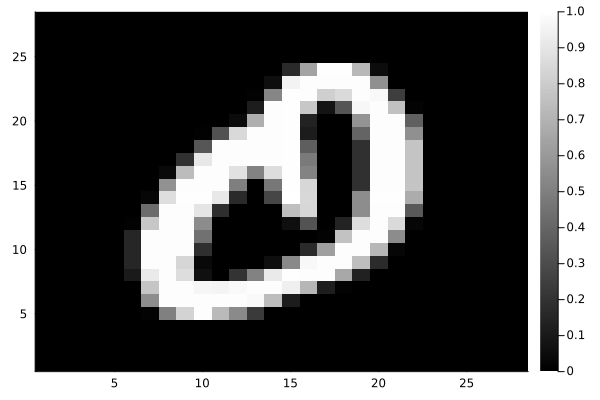

In [42]:
i = rand(1:length(traintargets))
println("Prediction: $(argmax(predict(netsoa, traininputsflatvec[i])) - 1)")
println("Bit-encoded target: $(onehotdecodedigits(traintargetsencoded[i]))")
println("Actual target: $(traintargets[i])")
heatmap(reverse(transpose(traininputs[:,:,i]), dims=1), cmap=:bone)

In [57]:
@time predictionerror(netsoa, traininputsflatvec, traintargetsencoded)

  0.703016 seconds (1.92 M allocations: 676.539 MiB, 15.05% gc time)


0.3787698783365366

In [58]:
temp3 = predict(netaos, traininputsflatvec)
@time netaos.loss.(temp3, traintargetsencoded)

  0.014304 seconds (122.45 k allocations: 8.811 MiB, 30.03% compilation time)


60000-element Vector{Float64}:
 0.4563750741560499
 0.1082534657597967
 0.4372070574108965
 0.04773544729049753
 0.42999776396031014
 0.4368221623387405
 0.04524329816846866
 0.44685008102567575
 0.04671234375153062
 0.43430269462435406
 0.43827930624386835
 0.4951553821100075
 0.44228340168706987
 ⋮
 0.42546348411861945
 0.4369303278848912
 0.43040123379922
 0.4492979547393574
 0.4285138905538878
 0.4614380767057673
 0.049479818581194185
 0.4412969163187453
 0.4389919980118193
 0.4575868795001449
 0.39704185844851647
 0.4603601552366051

In [50]:
pre = Vector{Vector{Float64}}(undef, numlayers(netsoa))
post = Vector{Vector{Float64}}(undef, numlayers(netsoa))
δatlayer = Vector{Vector{Float64}}(undef, numlayers(netsoa) - 1)

function test1(netsoa, δatlayer, traininputsflatvec, traintargetsencoded, pre, post;
                numweightlayers = numlayers(netsoa) - 1)
    for (input, target) in zip(traininputsflatvec, traintargetsencoded)
        (output, _, _) = forwardpass_keepvals!(netsoa, input, pre, post)
        outputerror = ((output .- target) .* netsoa.gradients[end](pre[end]))
        δatlayer[end] = outputerror

        for layerindex in (numweightlayers-1):-1:1
            δatlayer[layerindex] = ((transpose(netsoa.weights[layerindex+1]) 
                                      * δatlayer[layerindex+1])
                                     .* netsoa.gradients[layerindex](pre[layerindex]))
        end

        for (layerindex, δ, postactivation) in zip(1:numweightlayers, δatlayer, post)
            # in zip(neurnet.weights, neurnet.bias, δatlayer, postactivations)
            netsoa.weights[layerindex] .-= 0.046 .* δ .* postactivation'
            netsoa.bias[layerindex] .-= 0.046 .* δ
        end
    end
end
    
@time test1(netsoa, δatlayer, traininputsflatvec, traintargetsencoded, pre, post)

  2.756914 seconds (7.97 M allocations: 1.535 GiB, 13.05% gc time, 31.01% compilation time)


In [ ]:
@time predict(netsoa, traininputsflatvec)
@time predict(netsoa, traininputsflat)
@time predict(netaos, traininputsflatvec)
@time predict(netaos, traininputsflat)
# Using a matrix rather than a vector of vectors results in only minor speedups.

In [ ]:
typeof(traininputsflat)

In [ ]:
min(length(traintargetsencoded), length(traininputsflatvec))

In [ ]:
predictionerror(netsoa, traininputsflatvec, traintargetsencoded)

In [ ]:
[1.0 0.0; 0.0 1.0] == BitArray([1 0; 0 1])

In [ ]:
i = rand(1:(size(traininputs)[end]))
netsoa

In [ ]:
input = [rand(Float64, 784) for _ in 1:60_000]

In [ ]:
predict(netsoa, input)

In [ ]:
predict(netsoa, input, keepvals=true)

In [ ]:
sigmoid(0)

In [ ]:
netaos.weightlayers[1].weights * input

In [ ]:
predict(netaos, input)

In [ ]:
predict(netaos, input, keepvals=true)

In [ ]:
@time predict(netsoa, input)
@time predict(netsoa, input, keepvals=true)
@time predict(netaos, input)
@time predict(netaos, input, keepvals=true)
# Once again, roughly the same time, exactly the same memory usage

In [ ]:
@time DenseNeuralNetworkSoA([784, 60, 60, 10])
@time DenseNeuralNetworkAoS([784, 60, 60, 10])
# Roughly the same initialization time and memory usage

In [ ]:
@time repeat([3], 1000) 
@time 3 .* ones(1000)
@time fill(3, 1000) # This one's the fastest and most memory efficient

In [ ]:
temp4(x) = (1+x, x)
temp5(x,y) = x+y
temp5(temp4(1)...)

In [ ]:
function activatelayer(weightlayer::WeightLayer, input::Vector{<:Number})
    return weightlayer.activationfunction(weightlayer.weights * input 
                                          + weightlayer.bias)
end

In [ ]:
size(zeros(3,2))

In [ ]:
M = rand(Float64, (10_000, 10_000));
x = rand(Float64, 10_000);
b = rand(Float64, 10_000);

In [ ]:
function testcopy(M, x, b) 
    s = x
    for _ in 1:1000
        copy!(s, M*s .+ b)
    end
    return s
end

function reassignvec(M, x, b)
    s = x
    for _ in 1:1000
        s = M*s .+ b
    end
    return s
end

# These two, once compiled, allocate exactly the same amount of memory, 
# tho testcopy takes >10% longer
# Vector reassignment is fine!

In [ ]:
s = zeros(10_000)
@time testcopy(M, x, b)
@time reassignvec(M, x, b)

In [ ]:
g = copy!(c,d)

In [ ]:
function activatelayer!(weightmat, biasvec, inputs, outputs, index)
    copy!(inputs[index+1], copy!(outputs, weightmat * inputs[index] .+ biasvec))
    inputs[index+1] = outputs[index] = weightmat * inputs[index]

In [ ]:
M = [2 0; 0 -1]
x = [1, -3]
b = [4, 4]
M*x + b

In [ ]:
temp = [[1,2],[3,4,5]]



@time (x -> (x .+ 2)).(temp)
println((x -> (x .+ 2)).(temp))

function tempf(temp::Vector{Vector{T}}) where T <: Number
    temp3 = Vector{Vector{T}}(undef, length(temp))
    for (index, tempvec) in enumerate(temp)
        temp3[index] = tempvec .+ 2
    end
    return temp3
end

@time tempf(temp)
println(tempf(temp))

tempf2(x::Vector{Vector{Float64}}) = x .+ 2

@time tempf2.(temp)
println(tempf2.(temp))

In [ ]:
@time tempf(temp)
println(tempf(temp))

@time tempf2.(temp)
println(tempf2.(temp))

In [ ]:


"""
Preactivation function given `neuron`'s weights. Uses `dot` rather than 
    broadcasting so that it throws an error if the dimensions of 
    `input` and `neuron.weights` are not equal.
"""
preactivation(neuron::SingleNeuron, input) = (dot(input, neuron.weights) 
                                              + neuron.bias)

"""
Preactivation function. Uses `dot` rather than broadcasting so that 
    it throws an error if the dimensions of `input` and 
    `neuron.weights` are not equal.
"""
preactivation(input, weights, bias) = dot(input, weights) + bias

"""
Uses `neuron`'s weights to predict the output given a single 
input. Not an exported function.
"""
function predictsingle(neuron::SingleNeuron, input)
    return neuron.activationfunction(preactivation(neuron, input))
end

"""
Uses `neuron`'s weights to predict the output given multiple inputs.
Not an exported function.
"""
function predictmultiple(neuron::SingleNeuron, inputs)
    return [predictsingle(neuron, input) for input in inputs]
end

"""
Uses `neuron`'s weights to predict the output given a single 
input.
"""
function predict(neuron::SingleNeuron, input)
    return neuron.activationfunction(preactivation(neuron, input))
end

"""
Uses `neuron`'s weights to predict the output given a vector 
input. Whether `input` is treated as a single input or multiple
inputs depends on whether the dimension of `input` matches that 
of `neuron.weights`.
"""
function predict(neuron::SingleNeuron, input::Vector{<:Number})
    if length(neuron.weights) == length(input)
        return predictsingle(neuron, input)
    else
        return predictmultiple(neuron, input)
    end
end

"""
Uses `neuron`'s weights to predict the output given a `DataFrame`
input.
"""
function predict(neuron::SingleNeuron, inputs::DataFrame)
    return [predictsingle(neuron, input) 
            for input in eachrow(inputs)]
end

"""
Uses `neuron`'s weights to predict the output given multiple inputs.
Treats each vector in `inputs` as a single input.
"""
function predict(neuron::SingleNeuron, inputs::Vector{<:Vector})
    return predictmultiple(neuron, inputs)
end

"""
Uses `neuron`'s weights to predict the output given a range of 
inputs. Treats each element of `inputs` as a single input.
"""
function predict(neuron::SingleNeuron, inputs::AbstractRange)
    return predictmultiple(neuron, inputs)
end


In [ ]:
32 isa Int

In [ ]:
round(Int64, 54.3)

In [ ]:
temp = [1,2,3]

In [ ]:
Vector{Matrix{Float64}}(undef, 3)

In [ ]:
repeat([2],3)